# Lesson 2. Human Genome II

## 2.1. Concepts

### 2.1.1. Translation and Reading Frames

We can understand translation as decoding the mRNA to create a **polypeptide**. This polypeptide is a protein that can be made of more polypeptides. The polypeptide is made of **codons**. Each codon is a traslation of three consecutive nucleotides.

The **codon table** can be used to translate from the genetic code into a sequence of amino acids. It basically takes an RNA (replace the Ts for Us) and depending on the combination of 3 nucleotides we obtain an amino acid or a start and stop codons. These start and stop codons are the ones responsible for telling the ribosome that processes it to start or stop processing. 

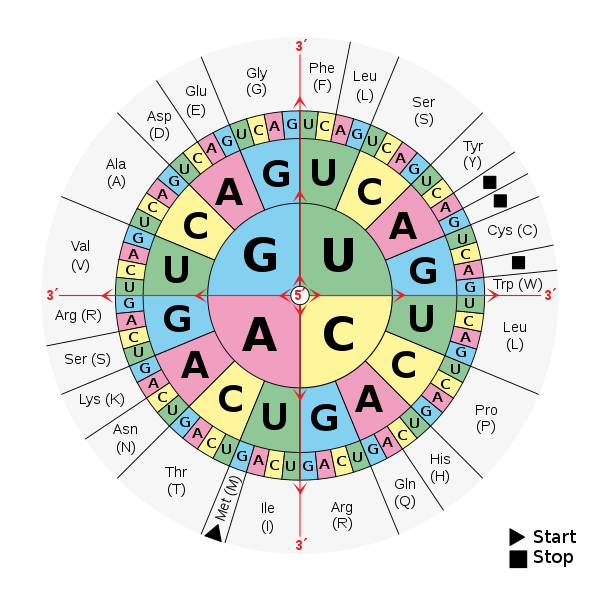

Image source: https://en.wikipedia.org/wiki/DNA_and_RNA_codon_tables

So using the table above we would translate the sequence "AUCAACUGG" to "INW" because:
* AUC = Ile (I)
* AAC = Asn (N)
* UGG = Trp (W)

From a same sequence we can extract multiple **reading frames**. A reading frame is a way of dividing the sequence into a set of consecutive, non-overlapping triplets.

For example, for the sequence AUCAACUGG (rna transcripted from dna) we can extract these reading frames:
* **AUCAACUGG**: I-N-W
* A**UCAACU**GG: S-T
* AU**CAACUG**G: Q-L

From a DNA (with two DNA strands) we can obtain 6 reading frames: 
* The first three from the three possible reading frames starting from **positions 0, 1 and 2**
* The last three is the same but because it is the other DNA strand, the sequence is the **reverse complementary**

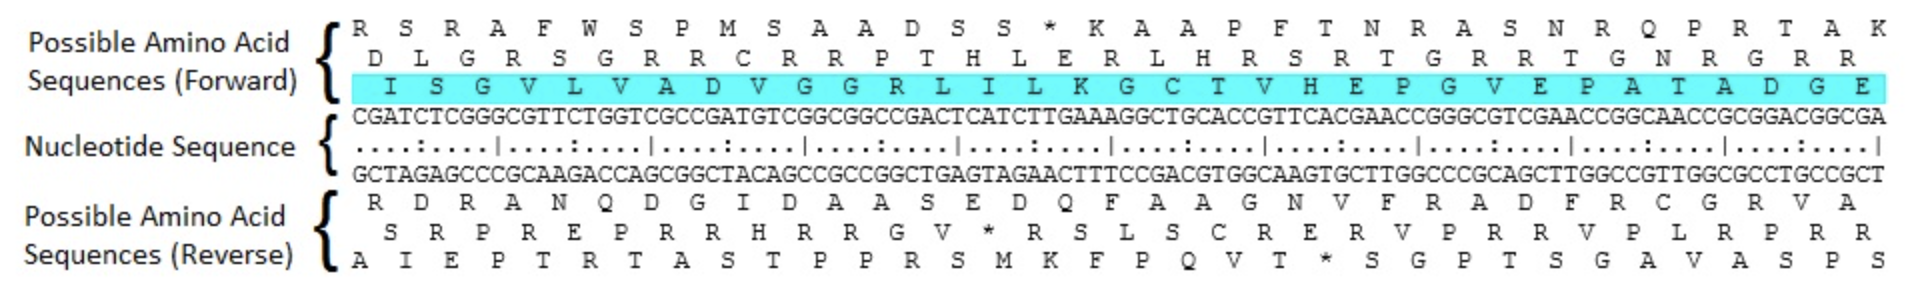

### 2.1.2. Open Reading Frames

An Open Reading Frame (ORF) is a part of a reading frame that starts with a START codon (M) and finishes with a STOP codon.

For example, if we extract the amino acids from the sequence ACAAUGAAACCAUGAACACCA we get T-M-K-P-STOP-T-P and from this reading frame we can get the open reading frame MKP because it starts with an M and ends with a STOP.

An ORF can contain another ORF, for example: METAMFG-STOP.

This one contains "METAMFG" and "MFG"

## 2.2. Examples

We will use some functions from the previous lesson.

In [ ]:
dna = "TTCACCTATGAATGGACTGTCCCCAAAGAAGTAGGACCCACTAATGCAGATCCTGTGTGTCTAGCT"

In [ ]:
complementaryNucs = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}

In [ ]:
def transcription(seq):
    seq = seq.upper()
    arn = seq.replace('T','U')
    return arn

In [ ]:
def complementary(seq):
    c = [complementaryNucs[nuc] for nuc in seq.upper()]
    c = ''.join(c)
    return c

In [ ]:
def reverse_complementary(seq):
    c = complementary(seq)
    return c[::-1]

### Example 1. Translation

For the translation we will use a codon table as a python dictionary:

In [ ]:
# 'M' equals to START and '_' equals to STOP
codon_table = {
    # Phe F
    "UUU": "F",
    "UUC": "F",
    # Leu L
    "UUA": "L",
    "UUG": "L",
    # Leu S
    "UCU": "S",
    "UCC": "S",
    "UCA": "S",
    "UCG": "S",
    # Tyr (Y)
    "UAU": "Y",
    "UAC": "Y",
    # Stop
    "UAA": "_",
    "UAG": "_",
    # Cys C
    "UGU": "C",
    "UGC": "C",
    # Stop
    "UGA": "_",
    # Trp W
    "UGG": "W",
    # Leu L
    "CUU": "L",
    "CUC": "L",
    "CUA": "L",
    "CUG": "L",
    # Pro P
    "CCU": "P",
    "CCC": "P",
    "CCA": "P",
    "CCG": "P",
    # His H
    "CAU": "H",
    "CAC": "H",
    # Gin Q
    "CAA": "Q",
    "CAG": "Q",
    # Arg R
    "CGU": "R",
    "CGC": "R",
    "CGA": "R",
    "CGG": "R",
    # Ile I
    "AUU": "I",
    "AUC": "I",
    "AUA": "I",
    # Met M
    "AUG": "M",
    # Thr T
    "ACU": "T",
    "ACC": "T",
    "ACA": "T",
    "ACG": "T",
    # Asn N
    "AAU": "N",
    "AAC": "N",
    # Lys K
    "AAA": "K",
    "AAG": "K",
    # Ser S
    "AGU": "S",
    "AGC": "S",
    # Arg R
    "AGA": "R",
    "AGG": "R",
    # Val V
    "GUU": "V",
    "GUC": "V",
    "GUA": "V",
    "GUG": "V",
    # Ala A
    "GCU": "A",
    "GCC": "A",
    "GCA": "A",
    "GCG": "A",
    # Asp D
    "GAU": "D",
    "GAC": "D",
    # Glu E
    "GAA": "E",
    "GAG": "E",
    # Gly G
    "GGU": "G",
    "GGC": "G",
    "GGA": "G",
    "GGG": "G",
}

We must translate from a given position of the sequence because the function should be able to return the three possible reading frames (starting from position 0, 1 and 2). Thats why we hace the ```init_pos``` param, its default value is zero because its the most common reading frame.

In [ ]:
def translate(seq, init_pos=0):
    # First we need to work with rna so we pass it through our RNA function
    rna = transcription(seq)
    length = len(seq)-2
    return [codon_table[rna[i:i+3]] for i in range(init_pos,length,3)]

The return code means:
* ```for i in range(init_pos, length, 3)```: is looping through an array of integers, starting from ```init_pos``` (for example, 0), finishing in the value specified by *length* and doing this process by jumping three by three:

In [ ]:
for i in range(1,12,3):
    print(i)

1
4
7
10


* ```rna[i:i+3]]```: it will return three consecutive values starting from a position ```i```. If the sequence is "ABCDE" and ```i=1``` it will return "BCD" because it is starting in position 1 "B" and returning also the following two values "CD"

* ```codon_table[rna[i:i+3]]```: so from the three values returned it will try to find the corresponding codon in the codon table and append it. For example, if what ```rna[i:i+3]``` returns "CUA" it will try to find the corresponding codon and append "L"

The **length** can be tricky here. If we dont substract 2 from the length we can obtain incomplete triplets:

In [ ]:
seq = "ACAAUGAAACCAUGAACA"
incorrect_length = len(seq)
print("Incorrect length: ", incorrect_length)
for i in range(1,incorrect_length,3):
    print('[',i,']',seq[i:i+3])

Incorrect length:  18
[ 1 ] CAA
[ 4 ] UGA
[ 7 ] AAC
[ 10 ] CAU
[ 13 ] GAA
[ 16 ] CA


This is because python is still printing all the three values that it can find in ```[i:i+3]```, to fix it, we just need to substract 2 from the input length. Even if the length is 18 (divisible by three and doesnt need correction) because we just need the triplets its ok to access position 15 (16th) and return it whith the values from position 15,16 and 17 (16th, 17th and 18th)

In [ ]:
seq = "ACAAUGAAACCAUGAACA"
correct_length = len(seq)-2
print("Correct length: ", correct_length)
for i in range(0,correct_length,3):
    print(seq[i:i+3])

Correct length:  16
ACA
AUG
AAA
CCA
UGA
ACA


Here is an example of what amino acids this function can find in the following sequence.

In [ ]:
seq = "ACAAUGAAACCAUGAACACCA"
print(translate(seq, 1))

['Q', '_', 'N', 'H', 'E', 'H']


### Example 2. Counting Amino Acids

For statistical purposes we may want to count how many times an amino acid is repeated in a sequence.

In [ ]:
aminoacid = "L"
codon_dict = {}
rna = transcription(dna)
length = len(rna)-2
for i in range(0,length,3):
    if codon_table[rna[i:i+3]]==aminoacid:
        # if the codon is not registered in the codon list we insert 
        # by  equalizing its value to 1
        if rna[i:i+3] not in codon_dict:
            codon_dict[rna[i:i+3]] = 1
        # if it is in the dict we just 
        else:
            codon_dict[rna[i:i+3]] += 1
print(codon_dict)

{'CUA': 1}


### Example 3. Reading Frames

As we said before, we can obtain 6 reading frames from a two strand dna. So we just need to return a list that contains the translation of the foward and reverse complementary sequence with the initial positions 0, 1 and 2 to make the three possible combinations

In [ ]:
def reading_frames(seq):
    frames = []
    frames.append(translate(seq,0))
    frames.append(translate(seq,1))
    frames.append(translate(seq,2))
    frames.append(translate(reverse_complementary(seq),0))
    frames.append(translate(reverse_complementary(seq),1))
    frames.append(translate(reverse_complementary(seq),2))
    return frames

In [ ]:
for frame in reading_frames(dna):
    print(frame)

['F', 'T', 'Y', 'E', 'W', 'T', 'V', 'P', 'K', 'E', 'V', 'G', 'P', 'T', 'N', 'A', 'D', 'P', 'V', 'C', 'L', 'A']
['S', 'P', 'M', 'N', 'G', 'L', 'S', 'P', 'K', 'K', '_', 'D', 'P', 'L', 'M', 'Q', 'I', 'L', 'C', 'V', '_']
['H', 'L', '_', 'M', 'D', 'C', 'P', 'Q', 'R', 'S', 'R', 'T', 'H', '_', 'C', 'R', 'S', 'C', 'V', 'S', 'S']
['S', '_', 'T', 'H', 'R', 'I', 'C', 'I', 'S', 'G', 'S', 'Y', 'F', 'F', 'G', 'D', 'S', 'P', 'F', 'I', 'G', 'E']
['A', 'R', 'H', 'T', 'G', 'S', 'A', 'L', 'V', 'G', 'P', 'T', 'S', 'L', 'G', 'T', 'V', 'H', 'S', '_', 'V']
['L', 'D', 'T', 'Q', 'D', 'L', 'H', '_', 'W', 'V', 'L', 'L', 'L', 'W', 'G', 'Q', 'S', 'I', 'H', 'R', '_']


These are the 6 possible reading frames from the sequence. As you can see, there are two longer than the rest, that is because it reads all the nucleotids when reading from the first position.

### Example 4. Search for ORF in a sequence of amino acids

The concept is simple but the code can be a little be difficult at first.

* What we need is to iterate through a sequence of amino acids and detect when we get a 'M' (START) or a '_' (STOP)
* ```len(current_orf)>0```: If we get an 'M' we must check if the current ORF is empty or not because we are going to check the first position of it (```"if current_orf[0]!='M'"```) and if it is empty we will get an error
* If that first position is not an 'M' it means that we found the initial part of a possible ORF. For example, the current possible ORF is 'LTGD' and then we find and 'M' ('LTGDM') because it doesnt start by 'M' we need to clean the current possible ORF and append the 'M'. If the current possible ORF started by 'M' 'MLTDG' and we found an 'M' ('MLTDGM') we wouldnt clean it because we want the ORFs and the sub-ORFs inside it.
* If we found an '_' we would check also the length of the current possible ORF for the same reason
* If it doesnt start by 'M' we wont do anything because it isnt a valid ORF, it needs to start with an 'M'
* If it starts by 'M' it is a valid ORF but, before we append it to the list, we must check if there are any sub-ORFs inside it. This is achieved with a for loop that iterates the ORF backwards and when it finds an 'M' it appends that range to the list. For example, if we have 'MADMF' and find '_' we would run from the end until we find an 'M'. First it will encounter 'F-M' so it will save the ORF 'MF' then it will continue until it finds 'F-M-D-A-M' appending 'MADMF' to the list
* At the end we have ```current_orf.append(aa)``` wich just appends the amino acid found to the possible ORF to make all these calculations explained

In [ ]:
def find_orf_seq(aa_seq):
    orfs = []
    current_orf = []
    for aa in aa_seq:
        if aa=='M' and len(current_orf)>0:
            # we just want to clear the current possible orf when
            # it doesnt start by M because we also want the suborfs
            if current_orf[0]!='M':
                current_orf = []
        elif aa=='_' and len(current_orf)>0:
            # a complete orf has to have a M at the beggining (START codon)
            if current_orf[0]=='M':
                # we dont simply add the current orf, 
                # we add all the suborfs inside with a for loop
                # that goes backwards, from the end to the beginning
                for i in range(len(current_orf)-1,-1,-1):
                    if current_orf[i]=='M':
                        orfs.append(''.join(current_orf[i:len(current_orf)]))
                current_orf = []
        current_orf.append(aa)
    return orfs

In the following code you can see clearly how the backwards loop works.
* The first parameter in the range means when to start. This must be the last position, the length minus 1.
* The second one is when to finish, 0 minus 1.
* The last one is the step, because it goes backwards we want it to substract 1 in each iteration

In [ ]:
string="ABCDEF"
test=[]
for i in range(len(string)-1,-1,-1):
    print('string[',i,']:', string[i], '. Range[',i,':',len(string),']: ', string[i:len(string)])

string[ 5 ]: F . Range[ 5 : 6 ]:  F
string[ 4 ]: E . Range[ 4 : 6 ]:  EF
string[ 3 ]: D . Range[ 3 : 6 ]:  DEF
string[ 2 ]: C . Range[ 2 : 6 ]:  CDEF
string[ 1 ]: B . Range[ 1 : 6 ]:  BCDEF
string[ 0 ]: A . Range[ 0 : 6 ]:  ABCDEF


In [ ]:
aa_seq = ['A','L','M','S','M','F','G','L','_','G','M','F','_','R']
orfs = find_orf_seq(aa_seq)
print(orfs)

['MFGL', 'MSMFGL', 'MF']


### Example 5. Search for ORFs in a set of frames

In [ ]:
def find_orf_frames(frames):
    orfs = []
    for frame in frames:
        orfs_fragment = find_orf_seq(frame)
        if len(orfs_fragment) > 0:
            for orf in orfs_fragment:
                orfs.append(''.join(orf))
    return orfs

In [ ]:
frames = reading_frames(dna)
orfs = find_orf_frames(frames)
orfs

['MNGLSPKK', 'MQILCV', 'MDCPQRSRTH']

### Example 6. Example of a real genome secuence

Now we are going to test the code with a real sequence an try to find an ORF. This sequence is a Homo sapiens insulin (INS), variant 1, mRNA. It can be obtained from the [NCBI](https://www.ncbi.nlm.nih.gov/nuccore/NM_000207.3)

We should obtain a protein sequence like "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"

In [ ]:
# The Homo sapiens insuline mRNA sequence
NM_000207 = "AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCAAGCAGATCACTGTCCTTCTGCCATGGCCCTGTGGATGCGCCTCCTGCCCCTGCTGGCGCTGCTGGCCCTCTGGGGACCTGACCCAGCCGCAGCCTTTGTGAACCAACACCTGTGCGGCTCACACCTGGTGGAAGCTCTCTACCTAGTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGACCTGCAGGTGGGGCAGGTGGAGCTGGGCGGGGGCCCTGGTGCAGGCAGCCTGCAGCCCTTGGCCCTGGAGGGGTCCCTGCAGAAGCGTGGCATTGTGGAACAATGCTGTACCAGCATCTGCTCCCTCTACCAGCTGGAGAACTACTGCAACTAGACGCAGCCCGCAGGCAGCCCCACACCCGCCGCCTCCTGCACCGAGAGAGATGGAATAAAGCCCTTGAACCAGC"

In [ ]:
nm_frames = reading_frames(NM_000207)
nm_orfs = find_orf_frames(nm_frames)
nm_orfs

['ME',
 'MRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN',
 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN',
 'MPRFCRDPSRAKGCRLPAPGPPPSSTCPTCRSSASRRVLGV',
 'MLVQHCSTMPRFCRDPSRAKGCRLPAPGPPPSSTCPTCRSSASRRVLGV',
 'MAEGQ']

As we can see, the code works fine. It read the ORF correctly.



# 2.3. Final Exercise

### Example 1. Translation

Build a function that takes a dna sequence and initial position and returns the translation of that sequence starting from the given position. You may use the auxiliar functions that you need. Remember that the translation uses the transcription (RNA) and translates the nucleotides in triplets using the codon table.

In [ ]:
dna_e = "TATATGGAATGGATGACTGATAGTCTTCCCCTAGAAAGAAATGGTAGGATAGAATAGCC"

In [ ]:
# Possible answer 1
def e_1_1(seq, init_pos=0):
    rna = transcription(seq)
    length = len(seq)-2
    return [codon_table[rna[i:i+3]] for i in range(init_pos,length,3)]

# Possible answer 2
def e_1_2(seq, init_pos=0):
    rna = transcription(seq)
    tra = []
    length = len(rna)-2
    for i in range(0,length,3):
        tra.append(codon_table[rna[i:i+3]])
    return tra

print(e_1_1(dna_e))
print(e_1_2(dna_e))

['Y', 'M', 'E', 'W', 'M', 'T', 'D', 'S', 'L', 'P', 'L', 'E', 'R', 'N', 'G', 'R', 'I', 'E', '_']
['Y', 'M', 'E', 'W', 'M', 'T', 'D', 'S', 'L', 'P', 'L', 'E', 'R', 'N', 'G', 'R', 'I', 'E', '_']


Result: ['Y', 'M', 'E', 'W', 'M', 'T', 'D', 'S', 'L', 'P', 'L', 'E', 'R', 'N', 'G', 'R', 'I', 'E', '\_']

### Example 2. Counting Amino Acids

For statistical purposes we may want to count how many times an amino acid is repeated in a sequence.

In [ ]:
def e_2(seq, aminoacid):
    codon_dict = {}
    rna = transcription(dna)
    length = len(rna)-2
    for i in range(0,length,3):
        if codon_table[rna[i:i+3]]==aminoacid:
            if rna[i:i+3] not in codon_dict:
                codon_dict[rna[i:i+3]] = 1
            else:
                codon_dict[rna[i:i+3]] += 1
    return codon_dict

print(e_2(dna_e, "T"))

{'ACC': 1, 'ACU': 2}


Result: {'ACC': 1, 'ACU': 2}

### Example 3. Reading Frames

Build a function that takes a dna sequence and returns a list with 3 transaltions with position shifted from 0 to 2 and 3 of the same but from the reverse complementary.

In [ ]:
def e_3(seq):
    frames = []
    frames.append(e_1_1(seq,0))
    frames.append(e_1_1(seq,1))
    frames.append(e_1_1(seq,2))
    frames.append(e_1_1(reverse_complementary(seq),0))
    frames.append(e_1_1(reverse_complementary(seq),1))
    frames.append(e_1_1(reverse_complementary(seq),2))
    return frames

print(e_3(dna_e))

[['Y', 'M', 'E', 'W', 'M', 'T', 'D', 'S', 'L', 'P', 'L', 'E', 'R', 'N', 'G', 'R', 'I', 'E', '_'], ['I', 'W', 'N', 'G', '_', 'L', 'I', 'V', 'F', 'P', '_', 'K', 'E', 'M', 'V', 'G', '_', 'N', 'S'], ['Y', 'G', 'M', 'D', 'D', '_', '_', 'S', 'S', 'P', 'R', 'K', 'K', 'W', '_', 'D', 'R', 'I', 'A'], ['G', 'Y', 'S', 'I', 'L', 'P', 'F', 'L', 'S', 'R', 'G', 'R', 'L', 'S', 'V', 'I', 'H', 'S', 'I'], ['A', 'I', 'L', 'S', 'Y', 'H', 'F', 'F', 'L', 'G', 'E', 'D', 'Y', 'Q', 'S', 'S', 'I', 'P', 'Y'], ['L', 'F', 'Y', 'P', 'T', 'I', 'S', 'F', '_', 'G', 'K', 'T', 'I', 'S', 'H', 'P', 'F', 'H', 'I']]


Result: [['Y', 'M', 'E', 'W', 'M', 'T', 'D', 'S', 'L', 'P', 'L', 'E', 'R', 'N', 'G', 'R', 'I', 'E', '\_'], ['I', 'W', 'N', 'G', '\_', 'L', 'I', 'V', 'F', 'P', '\_', 'K', 'E', 'M', 'V', 'G', '\_', 'N', 'S'], ['Y', 'G', 'M', 'D', 'D', '\_', '\_', 'S', 'S', 'P', 'R', 'K', 'K', 'W', '\_', 'D', 'R', 'I', 'A'], ['G', 'Y', 'S', 'I', 'L', 'P', 'F', 'L', 'S', 'R', 'G', 'R', 'L', 'S', 'V', 'I', 'H', 'S', 'I'], ['A', 'I', 'L', 'S', 'Y', 'H', 'F', 'F', 'L', 'G', 'E', 'D', 'Y', 'Q', 'S', 'S', 'I', 'P', 'Y'], ['L', 'F', 'Y', 'P', 'T', 'I', 'S', 'F', '\_', 'G', 'K', 'T', 'I', 'S', 'H', 'P', 'F', 'H', 'I']]

### Example 4. Search for ORF in a sequence of amino acids

Build a function that takes a amino acid sequence and returns the ORFs in it. Remember that it has to return the ORFs and the sub ORFs inside.

In [ ]:
seq_e4 = "YMEWMTDSLPLERNGRIE_"

In [ ]:
# Build the function


In [ ]:
def e_4(aa_seq):
    orfs = []
    current_orf = []
    for aa in aa_seq:
        if aa=='M' and len(current_orf)>0:
            if current_orf[0]!='M':
                current_orf = []
        elif aa=='_' and len(current_orf)>0:
            if current_orf[0]=='M':
                for i in range(len(current_orf)-1,-1,-1):
                    if current_orf[i]=='M':
                        orfs.append(''.join(current_orf[i:len(current_orf)]))
                current_orf = []
        current_orf.append(aa)
    return orfs

print(e_4(seq_e4))

['MTDSLPLERNGRIE', 'MEWMTDSLPLERNGRIE']


Result: ['MTDSLPLERNGRIE', 'MEWMTDSLPLERNGRIE']

### Example 5. Search for ORFs in a set of frames

Build a function that takes frames and return the ORFs in them. Use the 

In [ ]:
frames_e = e_3(dna_e)

In [ ]:
def e_5(frames):
    orfs = []
    for frame in frames:
        orfs_fragment = find_orf_seq(frame)
        if len(orfs_fragment) > 0:
            for orf in orfs_fragment:
                orfs.append(''.join(orf))
    return orfs

e_5(frames_e)

['MTDSLPLERNGRIE', 'MEWMTDSLPLERNGRIE', 'MVG', 'MDD']

['MTDSLPLERNGRIE', 'MEWMTDSLPLERNGRIE', 'MVG', 'MDD']

### Example 6. Example of a real genome secuence

Find the ORFs in the sequence Homo sapiens Kidd blood group protein (SLC14A1) gene, exons 4, 5 and partial cds [texto del enlace](https://www.ncbi.nlm.nih.gov/nuccore/KJ946236.1).

You can test this code with an [online ORF finder](https://www.ncbi.nlm.nih.gov/orffinder/) by the NCBI.

In [ ]:
SLC14A1 = "ATGGAGGACAGCCCCACTATGGTTAGAGTGGACAGCCCCACTATGGTTAGGGGTGAAAACCAGGTTTCGCCATGTCAAGGGAGAAGGTGCTTCCCCAAAGCTCTTGGCTATGTCACCGGTGACATGAAAAAACTTGCCAACCAGCTTAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACCCGTGGTGCTCCAGTTCATTGA"

We should obtain a protein sequence like "MSREKVLPQSSWLCHR"

In [ ]:
nm_frames = reading_frames(SLC14A1)
nm_orfs = find_orf_frames(nm_frames)
nm_orfs

['MSPVT',
 'MSREKVLPQSSWLCHR',
 'MSPVT',
 'MNWSTTGLFFFFFFFFFFFFFFFFFFFFFFFFSLSWLASFFMSPVT',
 'MAKPGFHP']

Result: 
['MSPVT',
 'MSREKVLPQSSWLCHR',
 'MSPVT',
 'MNWSTTGLFFFFFFFFFFFFFFFFFFFFFFFFSLSWLASFFMSPVT',
 'MAKPGFHP']